# 모듈

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from platform import python_version

# random 고정시 필요한 모듈
import os
import random

# 모델 형성시 필요한 모듈
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import metrics

# local적인 모델 해석 
import lime
import lime.lime_tabular

# random 고정
os.environ['PYTHONHASHSEED'] = str(42)
np.random.seed(42)
random.seed(42)

In [2]:
print(f'python version: {python_version()}')
print(f'numpy version : {np.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'matplotlib version : {matplotlib.__version__}')
print(f'sklearn version : {sklearn.__version__}')
print(f'tensorflow version : {tf.__version__}')

python version: 3.7.4
numpy version : 1.18.5
pandas version : 1.1.1
matplotlib version : 3.3.1
sklearn version : 0.23.2
tensorflow version : 2.3.0


# train 데이터 가공

In [3]:
# 파일을 저장한 위치를 써 주세요.
directory = os.getcwd()

In [4]:
# training 에 필요한 데이터를 불러옵니다.
X_df=pd.read_excel(directory+'/X_for_train.xlsx') 

In [5]:
X = X_df.copy() ; X

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균방송분,...,PrimeTime,남성상품,여성상품,무이자,일시불,유명기업/브랜드,타 채널 시청자 수 평균,가전제품,농수축소분류,어류손질여부
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,10.0,...,프라임아님,1,0,0,0,0,1520.0,가전제품 아님,분류에없음,해당없음
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,10.0,...,프라임아님,0,1,0,0,0,1520.0,가전제품 아님,분류에없음,해당없음
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,10.0,...,프라임아님,1,0,0,0,0,1520.0,가전제품 아님,분류에없음,해당없음
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,10.0,...,프라임아님,0,1,0,0,0,1520.0,가전제품 아님,분류에없음,해당없음
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,10.0,...,프라임아님,1,0,0,0,0,1520.0,가전제품 아님,분류에없음,해당없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,35374,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,5.0,...,프라임아님,0,0,0,1,1,1335.9,가전제품 아님,분류에없음,해당없음
35375,35375,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000,5.0,...,프라임아님,0,0,1,0,1,1520.0,가전제품 아님,분류에없음,해당없음
35376,35376,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000,5.0,...,프라임아님,0,0,0,1,1,1520.0,가전제품 아님,분류에없음,해당없음
35377,35377,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000,5.0,...,프라임아님,0,0,1,0,1,1520.0,가전제품 아님,분류에없음,해당없음


In [6]:
# target data 를 빼냅니다.
y=X['취급액']

In [7]:
# 예측에 쓰지 않는 열 제거
X.drop(columns = ['Unnamed: 0','취급액','방송일시','마더코드','상품코드','상품명','년','일','시분','월일','시간열','정수노출(분)','요일/시간','날짜','시각'],inplace = True)

In [8]:
# 더미화
X = pd.get_dummies(X,columns=['월','요일','분기','상품군','PrimeTime','어류손질여부','가전제품','농수축소분류'])

In [9]:
# X_col 의 이름 저장
X_features=X.columns

In [10]:
# scaling 과정
# 큰 skewness 를 가지는 값들은 대부분 애초에 분포가 너무 틀어져있어 (노출 분은 20/10분이 거의다.) log/squre 등의 변환을 해도 똑같을거라 판단
# scaling 을 하는것으로 타협을 보았다.
# 그리고, 더미값을 가지는 경우에도 scaling 을 해 주어서 평균 0 / 분산 1 을 맞추어주는게 나중에 DNN 이 학습을 더 잘할 거라 판단하였다.(SELU 의 경우 모든 특성이 0,1 이여야한다.)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.10967928, -0.55549003, -0.20858117, ..., -0.06437268,
        -0.05297285, -0.08298992],
       [-0.10967928, -0.55549003, -0.20858117, ..., -0.06437268,
        -0.05297285, -0.08298992],
       [-0.10967928, -0.55549003, -0.20858117, ..., -0.06437268,
        -0.05297285, -0.08298992],
       ...,
       [-0.10967928, -0.35098812, -0.92228108, ..., -0.06437268,
        -0.05297285, -0.08298992],
       [-0.10967928, -0.36695236, -0.92228108, ..., -0.06437268,
        -0.05297285, -0.08298992],
       [-0.10967928, -0.3829166 , -0.92228108, ..., -0.06437268,
        -0.05297285, -0.08298992]])

In [11]:
# dataset train/test set 으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [12]:
# MAPE 정의
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# DNN 모델 training

In [13]:
# random 고정
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
np.random.seed(42)
random.seed(42)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1)

sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf)

tf.compat.v1.keras.backend.set_session(sess)

# 모델 훈련
model1 = keras.models.Sequential()
model1 = Sequential([
    Dense(128, kernel_initializer='normal', activation = "relu", input_shape=X_train.shape[1:]), 
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation = "relu"),
    Dropout(0.2),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dropout(0.2),
    Dense(1024, kernel_initializer='normal', activation = "relu"),
    Dropout(0.2),
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation = "relu"),
    Dropout(0.2),
    Dense(32, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal'), ])

model1.compile(loss="mape",  # 평가기준이 mape 이니까 이걸로 하자.
              optimizer=keras.optimizers.Adam())
checkpoint = keras.callbacks.ModelCheckpoint(filepath="predict_model1.h5", #저장할 모델 이름
                                             monitor = 'val_loss', #monitoring 할 기준
                                             save_best_only=True ) # 
early_stopping = keras.callbacks.EarlyStopping(patience=16, #2 만 줘보자.
                                             restore_best_weights=True)
history1 = model1.fit(X_train, y_train, 
                        epochs=160,
                        validation_data=(X_test, y_test),
                        callbacks=[checkpoint,early_stopping])
model1 = keras.models.load_model(filepath = "predict_model1.h5")
evaluation1 = model1.evaluate(X_test, y_test)

Epoch 1/160
885/885 [==============================] - 10s 12ms/step - loss: 64.0785 - val_loss: 48.4956
Epoch 2/160
885/885 [==============================] - 10s 11ms/step - loss: 47.7901 - val_loss: 47.3003
Epoch 3/160
885/885 [==============================] - 9s 11ms/step - loss: 46.2321 - val_loss: 45.0442
Epoch 4/160
885/885 [==============================] - 10s 11ms/step - loss: 44.7950 - val_loss: 44.0305
Epoch 5/160
885/885 [==============================] - 11s 13ms/step - loss: 43.7266 - val_loss: 44.4475
Epoch 6/160
885/885 [==============================] - 11s 13ms/step - loss: 42.9195 - val_loss: 43.3988
Epoch 7/160
885/885 [==============================] - 12s 13ms/step - loss: 42.6727 - val_loss: 42.9337
Epoch 8/160
885/885 [==============================] - 12s 14ms/step - loss: 42.1355 - val_loss: 42.4569
Epoch 9/160
885/885 [==============================] - 13s 15ms/step - loss: 41.7742 - val_loss: 42.4846
Epoch 10/160
885/885 [==============================] - 

885/885 [==============================] - 18s 20ms/step - loss: 35.9933 - val_loss: 40.0847
Epoch 79/160
885/885 [==============================] - 17s 19ms/step - loss: 36.0179 - val_loss: 40.0487
Epoch 80/160
885/885 [==============================] - 14s 16ms/step - loss: 35.9428 - val_loss: 40.0982
Epoch 81/160
885/885 [==============================] - 14s 16ms/step - loss: 35.8036 - val_loss: 40.1155
Epoch 82/160
885/885 [==============================] - 15s 17ms/step - loss: 35.8415 - val_loss: 40.7096
Epoch 83/160
885/885 [==============================] - 15s 17ms/step - loss: 35.7746 - val_loss: 40.4767
Epoch 84/160
885/885 [==============================] - 15s 17ms/step - loss: 35.9270 - val_loss: 40.2674
Epoch 85/160
885/885 [==============================] - 15s 17ms/step - loss: 35.6521 - val_loss: 39.8256
Epoch 86/160
885/885 [==============================] - 16s 18ms/step - loss: 35.7382 - val_loss: 40.2449
Epoch 87/160
885/885 [==============================] - 18s

In [14]:
# random 고정
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
np.random.seed(42)
random.seed(42)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1)

sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf)

tf.compat.v1.keras.backend.set_session(sess)

# 모델 훈련
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(200, activation="selu",kernel_initializer="lecun_normal",input_shape=X_train.shape[1:]))
model2.add(Dropout(0.2))
for layer in range(5):
    model2.add(keras.layers.Dense(200, activation="selu",kernel_initializer="lecun_normal"))
    model2.add(Dropout(0.2))
model2.add(keras.layers.Dense(100, activation="selu",kernel_initializer="lecun_normal"))
model2.add(Dropout(0.2))
model2.add(keras.layers.Dense(10))
model2.add(keras.layers.Dense(1))
model2.compile(loss="mape",  # 평가기준이 mape 이니까 이걸로 하자.
              optimizer=keras.optimizers.Adam())
checkpoint = keras.callbacks.ModelCheckpoint(filepath="predict_model2.h5", # 모델을 저장합니다.
                                             monitor = 'val_loss', #monitoring 할 기준
                                             save_best_only=True ) # 
early_stopping = keras.callbacks.EarlyStopping(patience=24, #2 만 줘보자.
                                             restore_best_weights=True)

history2 = model2.fit(X_train, y_train, 
                        epochs=160,
                        validation_data=(X_test, y_test),
                        callbacks=[checkpoint,early_stopping])
model2 = keras.models.load_model(filepath = "predict_model2.h5") # 위에서 학습한 모델을 불러옵니다.
evaluation2 = model2.evaluate(X_test, y_test) 

Epoch 1/160
885/885 [==============================] - 5s 5ms/step - loss: 67.3644 - val_loss: 53.1384
Epoch 2/160
885/885 [==============================] - 5s 5ms/step - loss: 52.7567 - val_loss: 49.3742
Epoch 3/160
885/885 [==============================] - 4s 5ms/step - loss: 50.1718 - val_loss: 47.9674
Epoch 4/160
885/885 [==============================] - 4s 5ms/step - loss: 48.8393 - val_loss: 46.6704
Epoch 5/160
885/885 [==============================] - 4s 5ms/step - loss: 47.5450 - val_loss: 45.5577
Epoch 6/160
885/885 [==============================] - 5s 5ms/step - loss: 47.1102 - val_loss: 45.0614
Epoch 7/160
885/885 [==============================] - 5s 5ms/step - loss: 46.1678 - val_loss: 44.2241
Epoch 8/160
885/885 [==============================] - 5s 5ms/step - loss: 45.7996 - val_loss: 45.1280
Epoch 9/160
885/885 [==============================] - 5s 6ms/step - loss: 45.4839 - val_loss: 44.0898
Epoch 10/160
885/885 [==============================] - 5s 5ms/step - los

Epoch 80/160
885/885 [==============================] - 4s 5ms/step - loss: 38.0137 - val_loss: 40.1187
Epoch 81/160
885/885 [==============================] - 4s 5ms/step - loss: 38.0359 - val_loss: 40.1008
Epoch 82/160
885/885 [==============================] - 4s 5ms/step - loss: 37.9450 - val_loss: 40.1514
Epoch 83/160
885/885 [==============================] - 4s 5ms/step - loss: 38.1156 - val_loss: 40.7617
Epoch 84/160
885/885 [==============================] - 4s 5ms/step - loss: 37.9980 - val_loss: 39.9594
Epoch 85/160
885/885 [==============================] - 4s 5ms/step - loss: 37.8766 - val_loss: 40.4155
Epoch 86/160
885/885 [==============================] - 5s 5ms/step - loss: 38.0237 - val_loss: 39.6551
Epoch 87/160
885/885 [==============================] - 5s 5ms/step - loss: 37.8489 - val_loss: 39.6217
Epoch 88/160
885/885 [==============================] - 5s 5ms/step - loss: 37.7911 - val_loss: 41.0794
Epoch 89/160
885/885 [==============================] - 5s 5ms/s

In [15]:
# random 고정
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
np.random.seed(42)
random.seed(42)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1)

sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf)

tf.compat.v1.keras.backend.set_session(sess)

model3 = keras.models.Sequential()
model3 = Sequential([
    Dense(128, kernel_initializer='he_normal', activation = "elu", input_shape=X_train.shape[1:]),
    Dropout(0.2),
    Dense(256, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(512, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(512, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(512, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(512, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(512, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(256, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(32, kernel_initializer='he_normal', activation = "elu"),
    Dropout(0.2),
    Dense(1, kernel_initializer='he_normal'), 
])

model3.compile(loss="mape",  # 평가기준이 mape 이니까 이걸로 하자.
              optimizer=keras.optimizers.Adam())
checkpoint = keras.callbacks.ModelCheckpoint(filepath="predict_model3.h5", #저장할 모델 이름
                                             monitor = 'val_loss', #monitoring 할 기준
                                             save_best_only=True ) # 
early_stopping = keras.callbacks.EarlyStopping(patience=16, #2 만 줘보자.
                                             restore_best_weights=True)

history3 = model3.fit(X_train, y_train, 
                        epochs=160,
                        validation_data=(X_test, y_test),
                        callbacks=[checkpoint,early_stopping])
model3 = keras.models.load_model(filepath = "predict_model3.h5")
evaluation3 = model3.evaluate(X_test, y_test) 

# 이게 43 달성....

Epoch 1/160
885/885 [==============================] - 15s 17ms/step - loss: 60.3121 - val_loss: 51.3654
Epoch 2/160
885/885 [==============================] - 14s 16ms/step - loss: 50.4279 - val_loss: 47.6534
Epoch 3/160
885/885 [==============================] - 14s 16ms/step - loss: 48.7745 - val_loss: 45.7281
Epoch 4/160
885/885 [==============================] - 14s 16ms/step - loss: 48.0774 - val_loss: 46.2274
Epoch 5/160
885/885 [==============================] - 14s 16ms/step - loss: 46.6298 - val_loss: 46.4282
Epoch 6/160
885/885 [==============================] - 14s 16ms/step - loss: 45.8271 - val_loss: 44.0845
Epoch 7/160
885/885 [==============================] - 14s 16ms/step - loss: 45.2848 - val_loss: 43.2978
Epoch 8/160
885/885 [==============================] - 14s 16ms/step - loss: 44.4949 - val_loss: 43.7094
Epoch 9/160
885/885 [==============================] - 14s 16ms/step - loss: 44.1190 - val_loss: 45.4092
Epoch 10/160
885/885 [==============================] -

885/885 [==============================] - 14s 16ms/step - loss: 37.2371 - val_loss: 40.0869
Epoch 79/160
885/885 [==============================] - 14s 16ms/step - loss: 37.2637 - val_loss: 40.0821
Epoch 80/160
885/885 [==============================] - 14s 16ms/step - loss: 36.7501 - val_loss: 40.0252
Epoch 81/160
885/885 [==============================] - 14s 16ms/step - loss: 36.9710 - val_loss: 40.0640
Epoch 82/160
885/885 [==============================] - 14s 16ms/step - loss: 36.8284 - val_loss: 39.8605
Epoch 83/160
885/885 [==============================] - 14s 16ms/step - loss: 36.9161 - val_loss: 40.4638
Epoch 84/160
885/885 [==============================] - 14s 16ms/step - loss: 37.0951 - val_loss: 39.9735
Epoch 85/160
885/885 [==============================] - 14s 16ms/step - loss: 36.9328 - val_loss: 39.7265
Epoch 86/160
885/885 [==============================] - 14s 16ms/step - loss: 36.9559 - val_loss: 39.7013
Epoch 87/160
222/222 [==============================] - 1s 

In [16]:
# 다른 모델들을 합쳐 하나의 모델로 앙상블한다.
# test 를 통해 어느정도의 성능이 나오는지 체크
y_pred = 0.3 * model1.predict(X_test) + 0.35 * model2.predict(X_test) + 0.35 * model3.predict(X_test)
MAPE(y_test,y_pred.reshape(-1))

38.68272049152054

# 예측 데이터 가공

In [17]:
# 처리된 X 예측 데이터. 더미화까지 진행되어있는 상태이다.
X_pred = pd.read_excel('X_for_predict.xlsx')

In [18]:
# 예측에 쓰지 않는 열 제거
X_pred.drop(columns = ['Unnamed: 0','방송일시','마더코드','상품코드','상품명','년','일','시분','월일','시간열','정수노출(분)','요일/시간','날짜','시각'],inplace = True)

In [19]:
# 열 이름 저장
X_pred_features = X_pred.columns

In [20]:
# scaling 은 앞에서 train 의 scailing 을 따른다.
X_pred_scaled = scaler.transform(X_pred)

In [21]:
# 예측값 형성
y_pred_ = 0.3 * model1.predict(X_pred_scaled) + 0.35 * model2.predict(X_pred_scaled) + 0.35*model3.predict(X_pred_scaled)

In [22]:
# 코로나에 의한 가중치
constant = 66832554962.686/66337499000

In [23]:
y_pred_ = constant * y_pred_

# 데이터 해석을 위한 xlsx 내보내기

In [24]:
# predict 를 했던 x 데이터에 예측값을 붙인 뒤, 각 요일/ 각 카테고리 등 에 대한 상위/하위 데이터들을 조사해 어떤 특징이 있는지 살펴보았다.

In [25]:
X_predict_data = pd.read_excel('X_for_predict.xlsx')

In [26]:
X_predict_data['판애액예측'] = pd.DataFrame(y_pred_)

In [28]:
X_predict_data.to_excel('데이터 해석.xlsx')

# 예측값 ecxel 로 형성하기

In [29]:
# 이제 평가데이터 엑셀 파일에 예측값을 붙여주어야 한다.
y_pred_excel=pd.read_excel('2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header=1)

In [30]:
y_pred_excel.drop(columns = ['취급액'],inplace=True)

In [31]:
# 앞서 제품군이 무형/ 토요일 1800 ~ 1820 에 시작하는 데이터는 예측에 쓰지 않기 때문에, index 를 새로 불러온다.
y_pred_index = pd.read_csv('predict_index.csv')

In [32]:
# 새 index 레 우리의 예측값을 붙여준다.
y_pred_index['취급액'] = pd.DataFrame(y_pred_)
y_pred_index.index = y_pred_index['index']
y_pred_index.drop(columns=['Unnamed: 0','index'],inplace=True)

In [33]:
# 그리고, 그 index 에 맞추어 merge 해 주어서 엑셀을 형성한다.
pred_final=pd.merge(y_pred_excel, y_pred_index, how='outer', left_index=True, right_index=True) 
pred_final

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,11694454.0
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,18411246.0
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,22643726.0
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,7672605.5
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,14808185.0
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,8024188.5


In [34]:
pred_final.to_excel('6월 판매실적 예측.xlsx')

# Lime 을 통한 해석

In [35]:
def predict(x):
    pred = 0.3*model1.predict(x)+ 0.35*model2.predict(x)+ 0.35*model3.predict(x)
    return pred.flatten()

In [36]:
X_features

Index(['노출(분)', '판매단가', '평균방송분', '겹치는수', '시청률평균', '06:00~08:00', '08:00~10:00',
       '10:00~12:00', '12:00~14:00', '14:00~16:00', '16:00~18:00',
       '18:00~20:00', '20:00~22:00', '22:00~00:00', '00:00~02:00',
       '02:00~04:00', '강수량(mm)', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '연예인', '월급날',
       '휴일', '상품군power', 'CPI', 'RS', '남성상품', '여성상품', '무이자', '일시불', '유명기업/브랜드',
       '타 채널 시청자 수 평균', '월_1', '월_2', '월_3', '월_4', '월_5', '월_6', '월_7', '월_8',
       '월_9', '월_10', '월_11', '월_12', '요일_금', '요일_목', '요일_수', '요일_월', '요일_일',
       '요일_토', '요일_화', '분기_1분기', '분기_2분기', '분기_3분기', '분기_4분기', '상품군_가구',
       '상품군_가전', '상품군_건강기능', '상품군_농수축', '상품군_생활용품', '상품군_속옷', '상품군_의류',
       '상품군_이미용', '상품군_잡화', '상품군_주방', '상품군_침구', 'PrimeTime_그외프라임',
       'PrimeTime_식품프라임', 'PrimeTime_오전프라임', 'PrimeTime_프라임아님', '어류손질여부_0',
       '어류손질여부_1', '어류손질여부_해당없음', '가전제품_TV', '가전제품_가전제품 아님', '가전제품_건조기',
       '가전제품_공기청정기', '가전제품_냉장고', '가전제품_노트북', '가전제품_무선청소기', '가전제품_세탁기',
       '가전제품_에어컨', '가전제품_의류관리기', '농수

In [37]:
# 위 한글이름의 값을 영어로 바꾸어주어야 lime 에서 출력이 제대로 되기 떄문에 바꾸어주었다.
X_features_ENG=['expsr(min)', 'unit_price', 'avg_cast_min', 'overlap_num', 'avg_ratings', '06:00~08:00', '08:00~10:00',
       '10:00~12:00', '12:00~14:00', '14:00~16:00', '16:00~18:00',
       '18:00~20:00', '20:00~22:00', '22:00~00:00', '00:00~02:00',
       '02:00~04:00', 'rainfall(mm)', 'avg_temp(℃)', 'min_temp(℃)', 'max_temp(℃)', 'celebrity', 'income',
       'holiday', 'type_power', 'CPI', 'RS', 'male', 'female', 'no_int', 'lump_sum_pay', 'brand',
       'avgviewer_othr_chnnls', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Fri', 'Thurs', 'Wed', 'Mon', 'Sun',
       'Sat', 'Tue', '1Q', '2Q', '3Q', '4Q', 'type_furn',
       'type_home_elec', 'type_health', 'type_agri_fish_lvstck', 'type_daily_gds', 'type_underclth', 'type_clth',
       'type_beauty', 'type_miscll', 'type_kitch', 'type_bed', 'PrimeTime_other',
       'PrimeTime_food', 'PrimeTime_morning', 'not_PrimeTime', 'fishtrim_0',
       'fishtrim_1', 'fishtrim_NA', 'home_elec_TV', 'not_home_elec ', 'home_elec_drier',
       'home_elec_airclean', 'home_elec_fridge', 'home_elec_notebk', 'home_elec_wrlss_vcmclnr', 'home_elec_washmch',
       'home_elec_aircon', 'home_elec_clothmch', 'agro_driedfish', 'agro_fruit', 'agro_kimchi',
       'agro_not_cat', 'agro_rice', 'agro_fish', 'agro_meat', 'agro_drink',
       'agro_sauce/spice', 'agro_snacks']

In [38]:
# set up the LIME explainer
np.random.seed(42)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                  training_labels = y_train,
                                                  feature_names = X_features_ENG,
                                                  mode = 'regression',
                                                  discretize_continuous = False)

In [39]:
# lime 은 아래와 같이 , local 한 데이터가 긍정/ 부정 영향인지, 얼마나 예측에 영향을 끼치는지 말해준다.
np.random.seed(42)
exp = explainer.explain_instance(X_pred_scaled[0],
                                 predict,
                                 num_features=20,
                                 distance_metric='euclidean',
                                 num_samples=1000)

plt.figure(figsize=(40,5))
exp.show_in_notebook(show_table=True, predict_proba=True, show_predicted_value=True)

<Figure size 2880x360 with 0 Axes>

In [40]:
# 각 20개의 상위 영향을 가진 값을 표출한다.
def expl(x):
    np.random.seed(42)
    exp = explainer.explain_instance(X_pred_scaled[x],
                                 predict,
                                 num_features=20,
                                 distance_metric='euclidean',
                                 num_samples=1000)
    print(exp.predicted_value)
    exp.as_pyplot_figure() ;

35432268.0
31081930.0
26850280.0


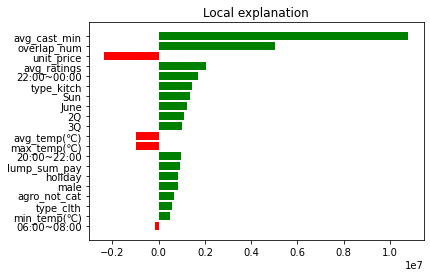

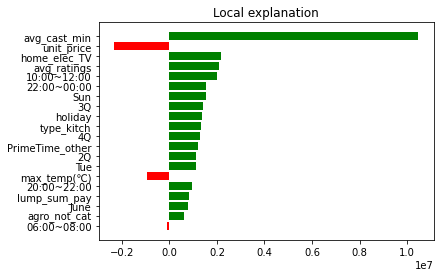

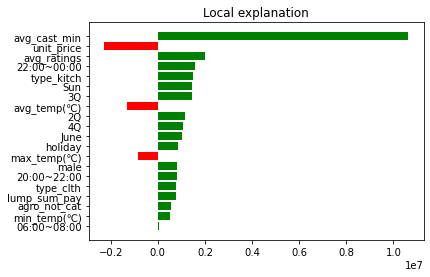

In [41]:
# 6시~8시 상위 
expl(1246)
expl(73)
expl(1245)

69665100.0
59690690.0
56396730.0


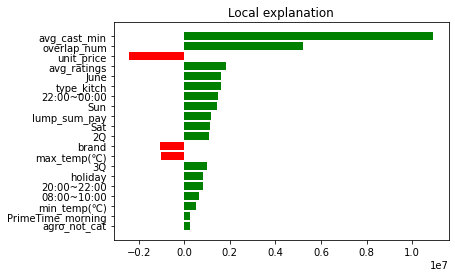

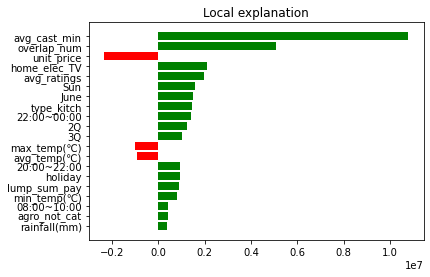

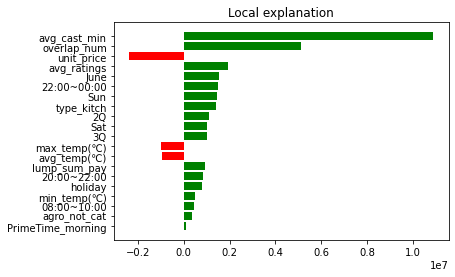

In [42]:
# 8:00 ~ 10:00 상위
expl(1787)
expl(1249)
expl(2396)

72801490.0
68872216.0
56883364.0


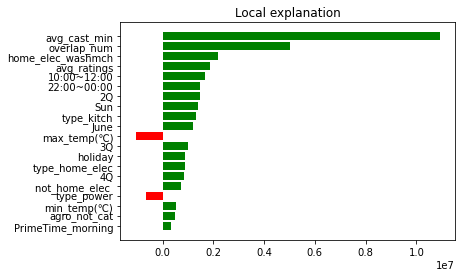

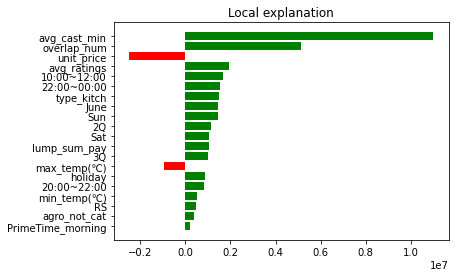

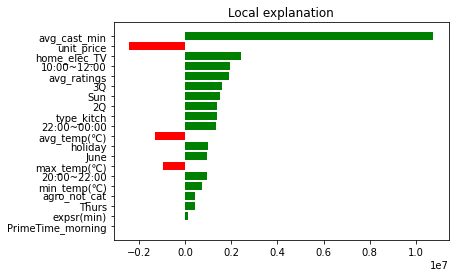

In [43]:
# 10:00 ~ 12:00 상위
expl(579)
expl(2399)
expl(973)

61089900.0
53983676.0
50473064.0


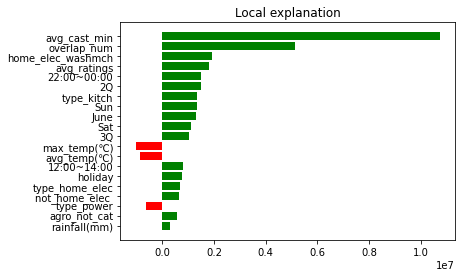

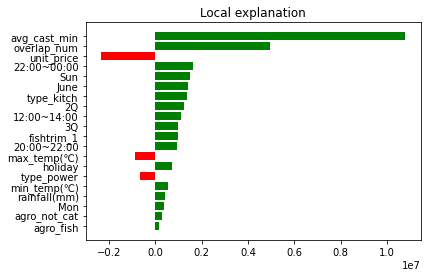

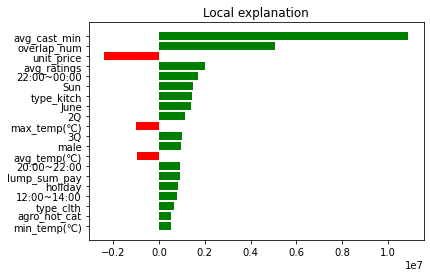

In [44]:
# 12:00 ~ 14:00 상위
expl(1177)
expl(2581)
expl(594)

70390710.0
58953148.0
55520960.0


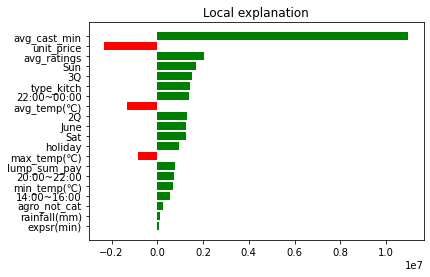

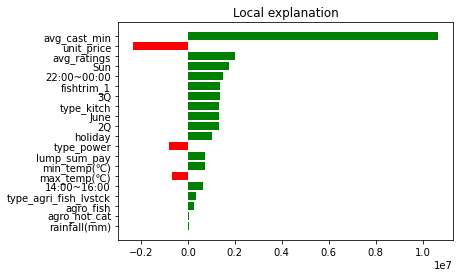

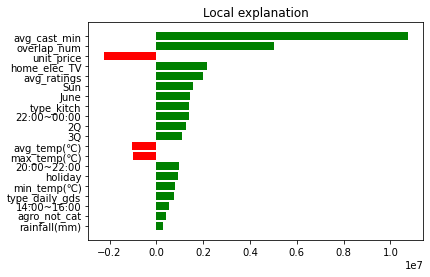

In [45]:
# 14:00 ~ 16:00 상위
expl(1195)
expl(1305)
expl(1285)

77402340.0
70987096.0
64289904.0


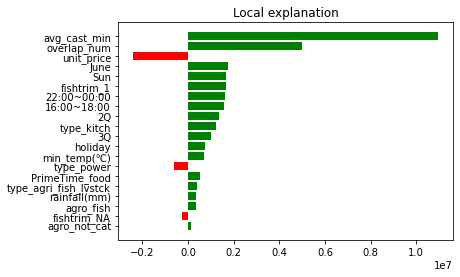

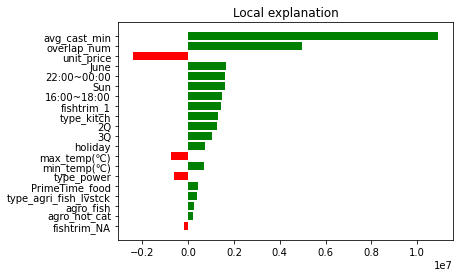

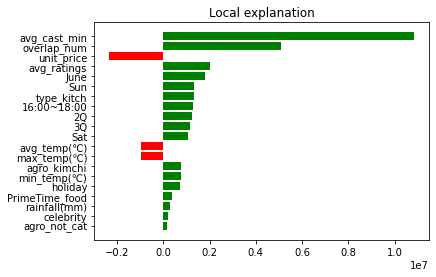

In [46]:
# 16:00 ~ 18:00 상위
expl(1306)
expl(1933)
expl(1201)

69508130.0
60603296.0
58477080.0


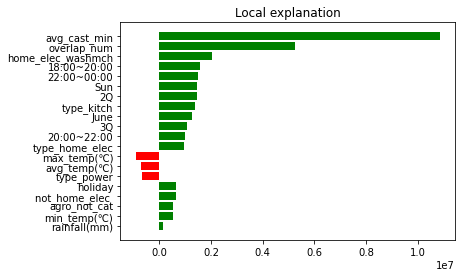

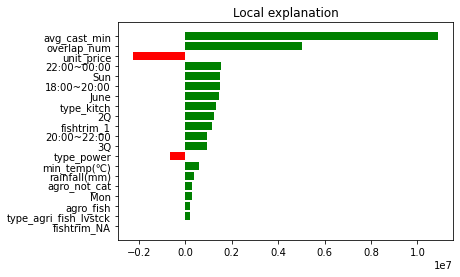

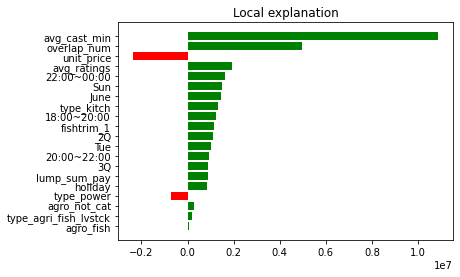

In [47]:
# 18:00 ~ 20:00 상위
expl(1321)
expl(2601)
expl(103)

75357350.0
74085580.0
67496240.0


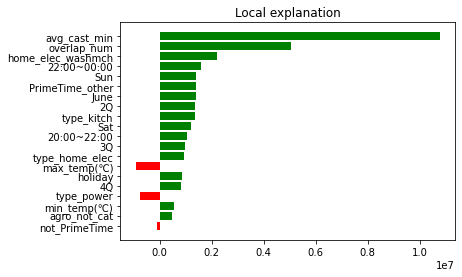

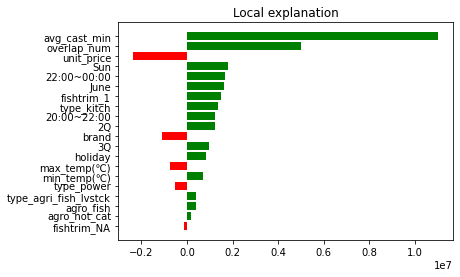

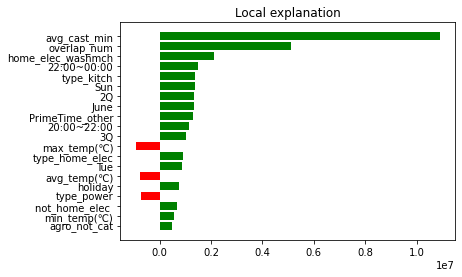

In [48]:
# 20:00 ~ 22:00 상위
expl(493)
expl(2543)
expl(1502)

68399310.0
61213400.0
59042870.0


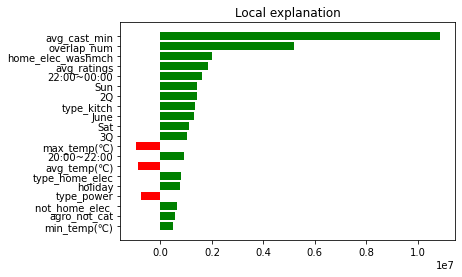

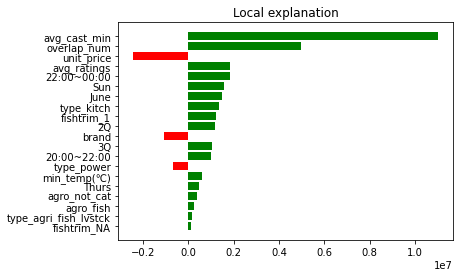

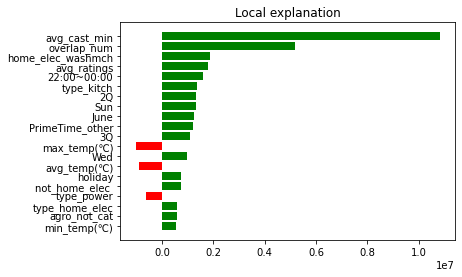

In [49]:
# 22:00 ~ 00:00 상위
expl(1863)
expl(2288)
expl(929)

31369192.0
30615468.0
29627060.0


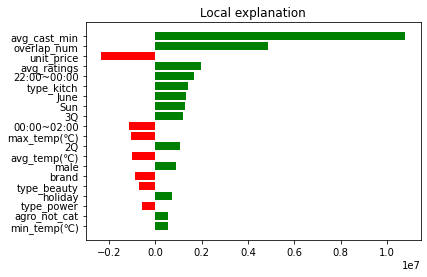

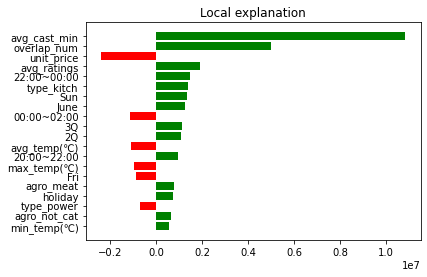

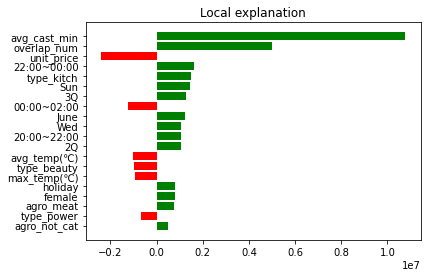

In [50]:
# 00:00 ~ 02:00 상위
expl(2478)
expl(1060)
expl(160)

20225100.0
18828370.0
18561386.0


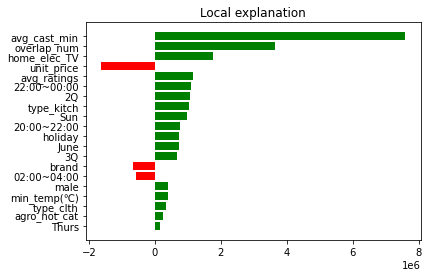

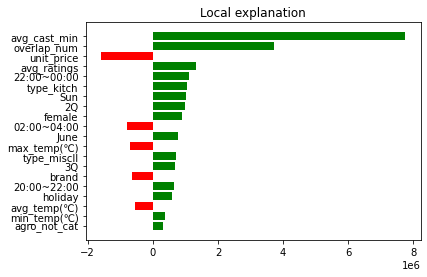

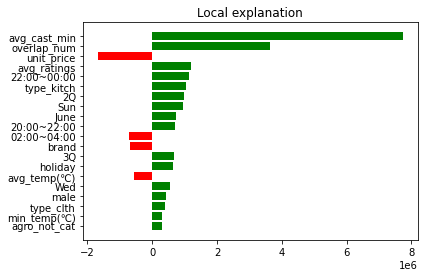

In [51]:
# 02:00 ~ 04:00 상위
expl(1604)
expl(547)
expl(2144)

56693380.0
54304976.0
50637492.0


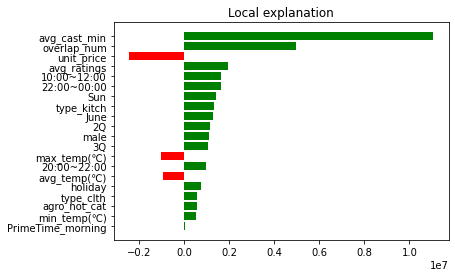

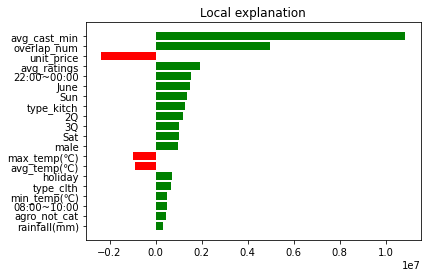

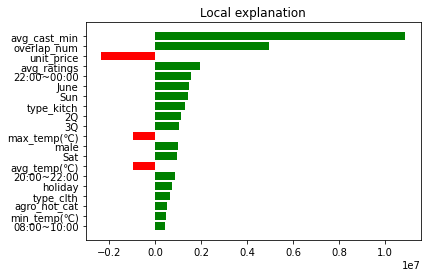

In [52]:
# 의류 상위
expl(1891)
expl(1156)
expl(1784)

58079156.0
55813416.0
54220496.0


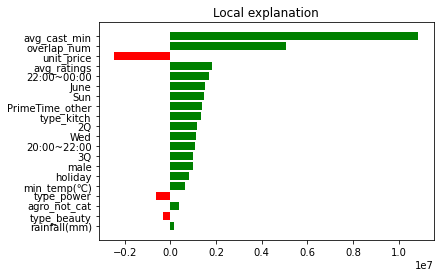

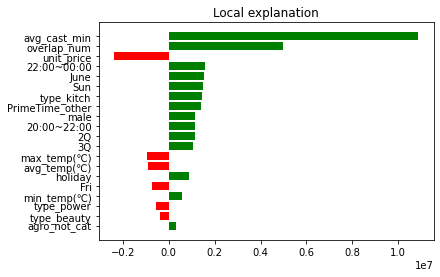

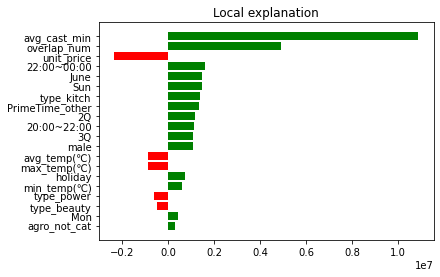

In [53]:
# 이미용 상위
expl(2189)
expl(1754)
expl(741)

39176390.0
37272920.0
36153720.0


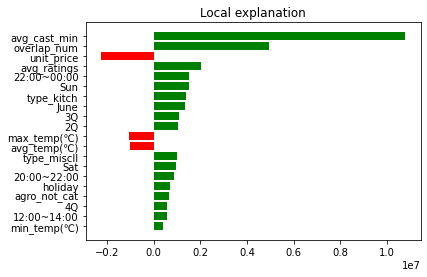

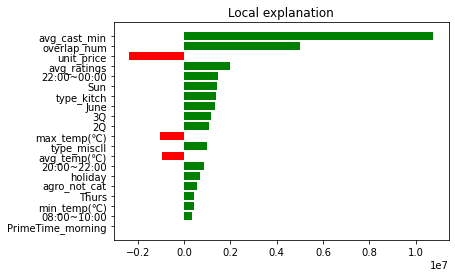

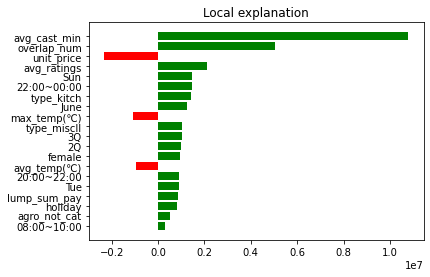

In [54]:
# 잡화 상위
expl(1813)
expl(248)
expl(1448)

19353102.0
19236176.0
19154080.0


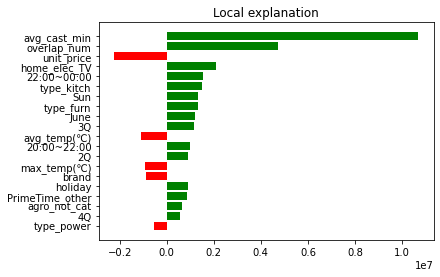

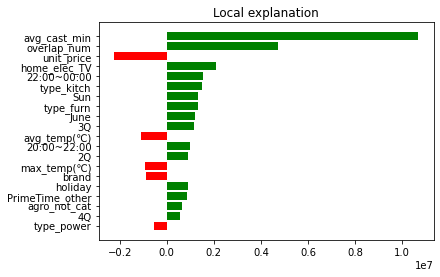

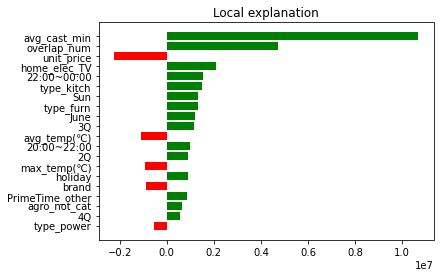

In [55]:
# 가구 상위
expl(644)
expl(645)
expl(646)

75357350.0
72801490.0
69508130.0


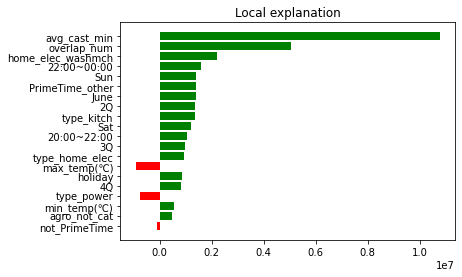

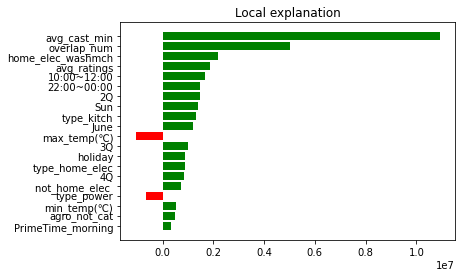

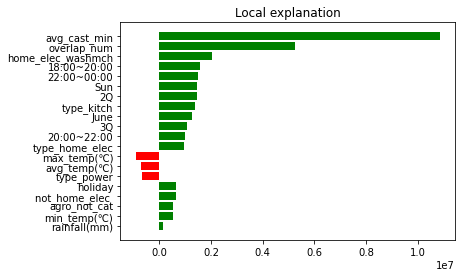

In [56]:
# 가전 상위
expl(493)
expl(579)
expl(1321)

35913764.0
31709996.0
26495670.0


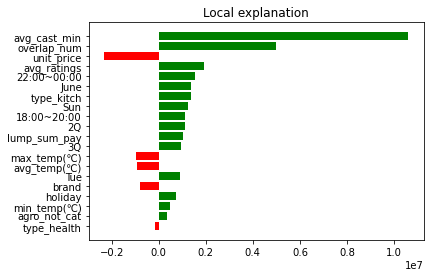

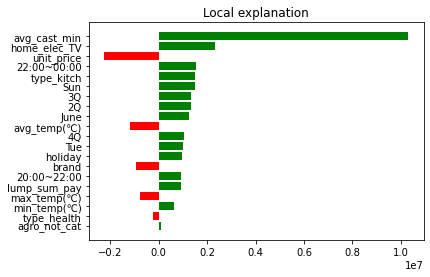

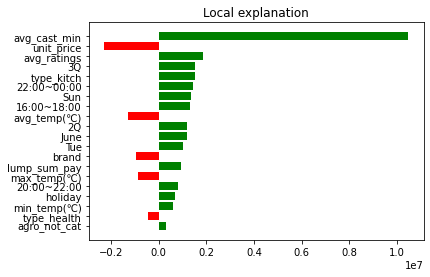

In [57]:
# 건강기능 상위
expl(2116)
expl(2138)
expl(2114)

77402340.0
74085580.0
70987096.0


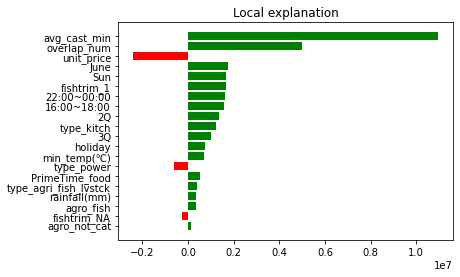

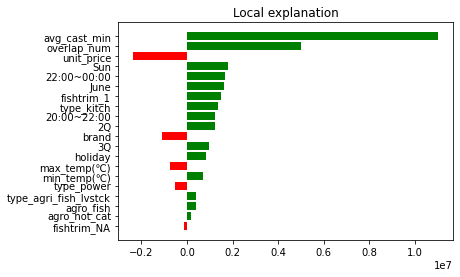

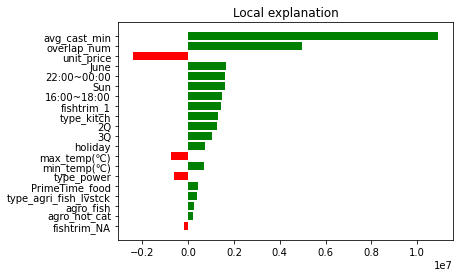

In [58]:
# 농수축 상위
expl(1306)
expl(2543)
expl(1933)

55520960.0
55276170.0
51140070.0


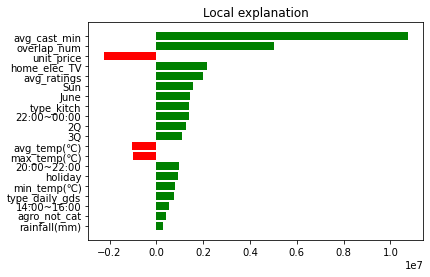

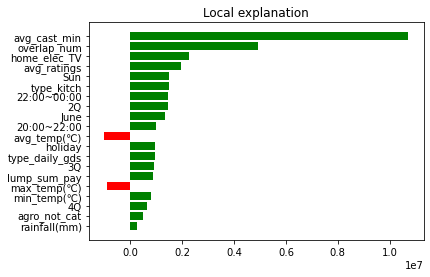

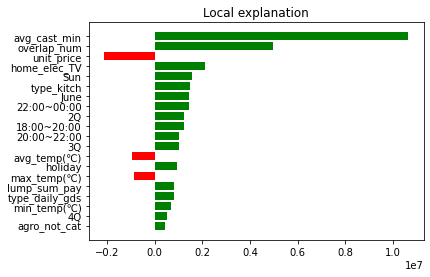

In [59]:
# 생활용품 상위
expl(1285)
expl(1364)
expl(634)

52498692.0
52241424.0
51935336.0


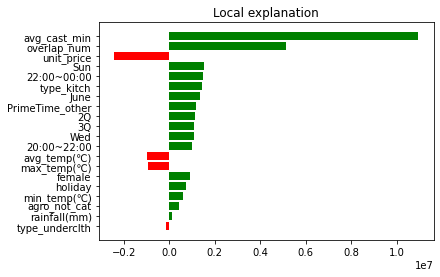

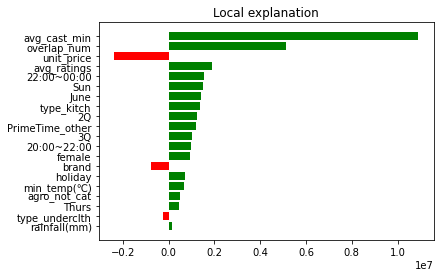

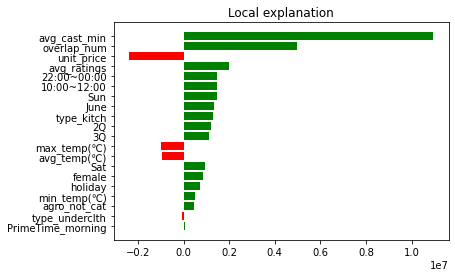

In [60]:
# 속옷 상위
expl(2192)
expl(1664)
expl(1165)

70390710.0
69665100.0
68872216.0


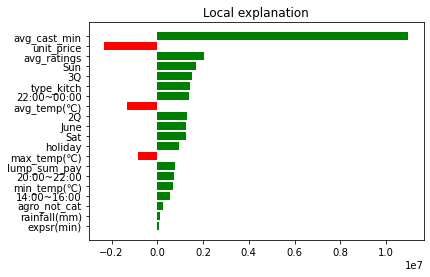

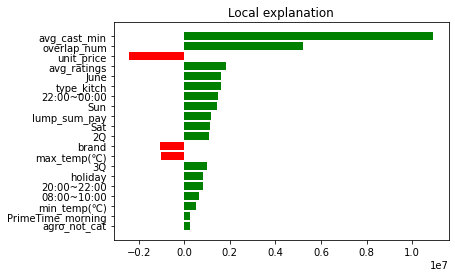

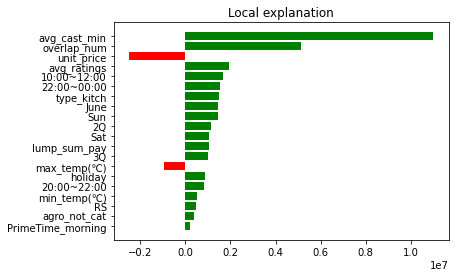

In [61]:
# 주방 상위
expl(1195)
expl(1787)
expl(2399)

14103423.0
14096272.0
14082188.0


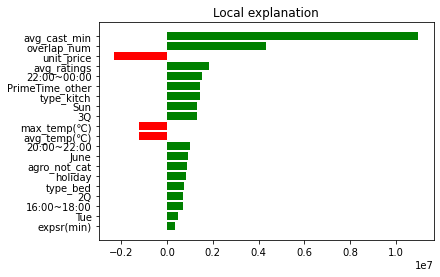

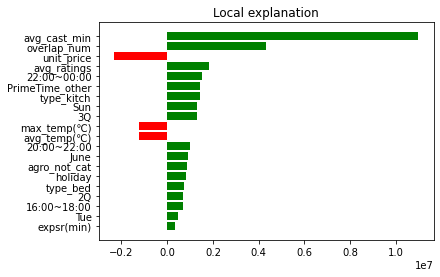

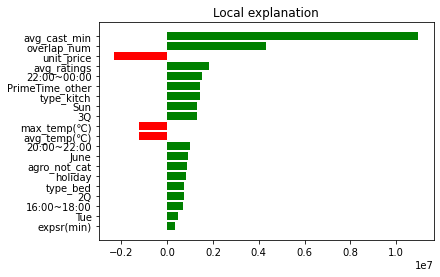

In [62]:
# 침구 상위
expl(809)
expl(808)
expl(807)

60603296.0
56562332.0
56247068.0


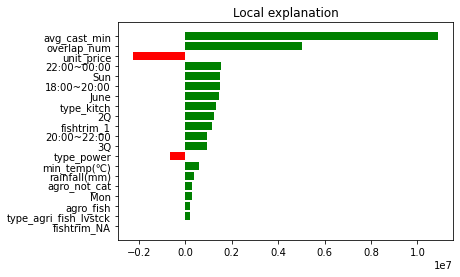

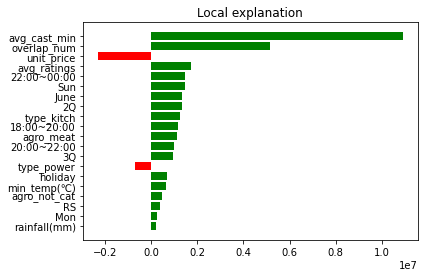

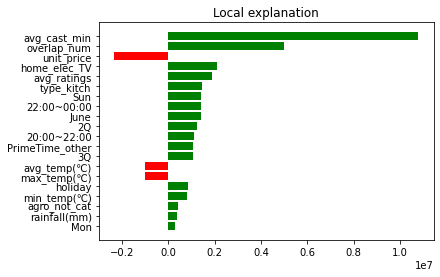

In [63]:
# 월요일 상위
expl(2601)
expl(2598)
expl(2604)

67496240.0
61691596.0
58477080.0


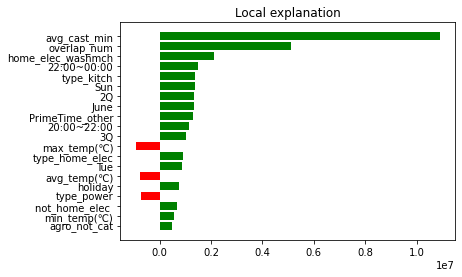

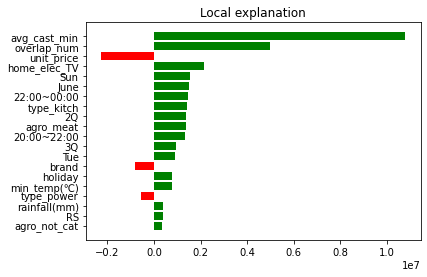

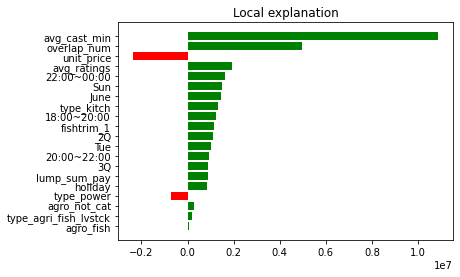

In [64]:
# 화요일 상위
expl(1502)
expl(2685)
expl(103)

66503188.0
59042870.0
58079156.0


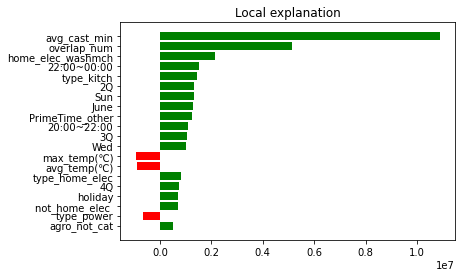

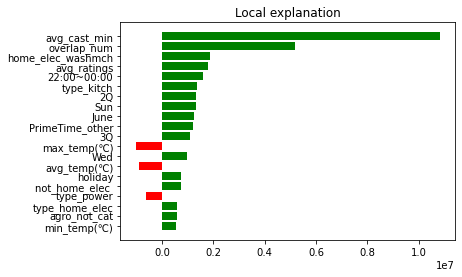

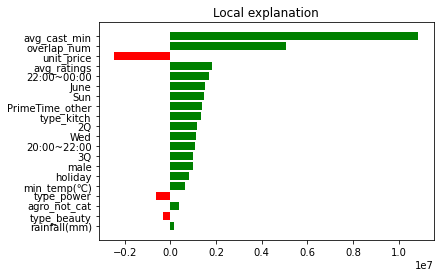

In [65]:
# 수요일 상위
expl(223)
expl(929)
expl(2189)

61213400.0
56883364.0
55468120.0


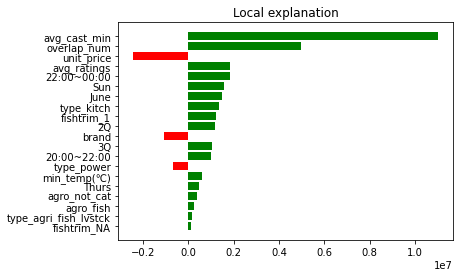

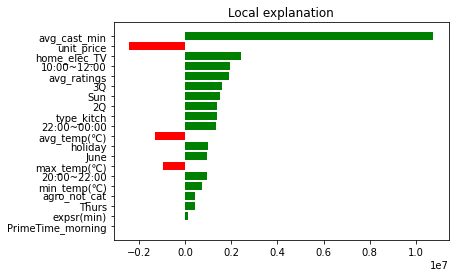

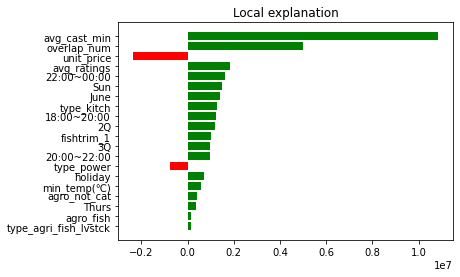

In [66]:
# 목요일 상위
expl(2288)
expl(973)
expl(2261)

63585104.0
55813416.0
54174496.0


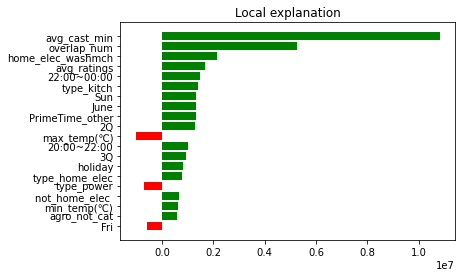

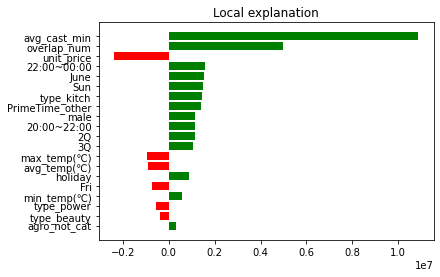

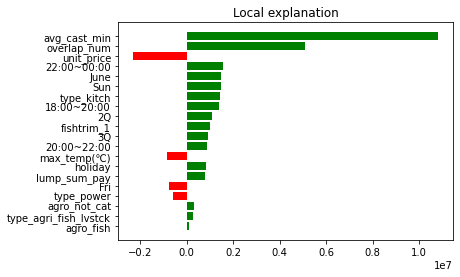

In [67]:
# 금요일 상위
expl(2366)
expl(1754)
expl(1751)

75357350.0
70390710.0
69665100.0


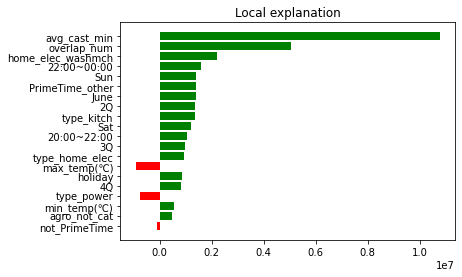

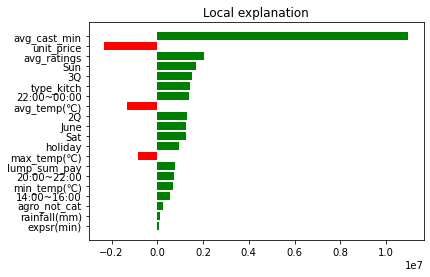

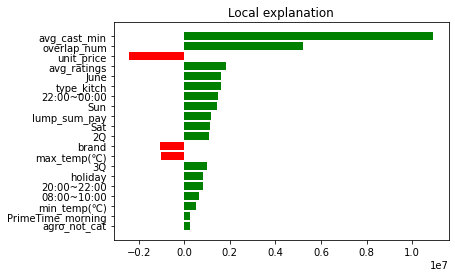

In [68]:
# 토요일 상위
expl(493)
expl(1195)
expl(1787)

77402340.0
74085580.0
72801490.0


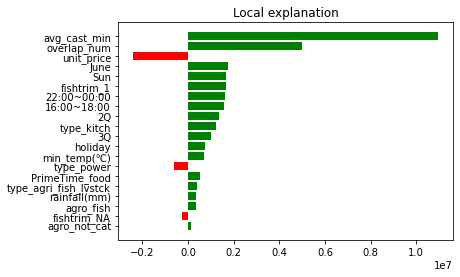

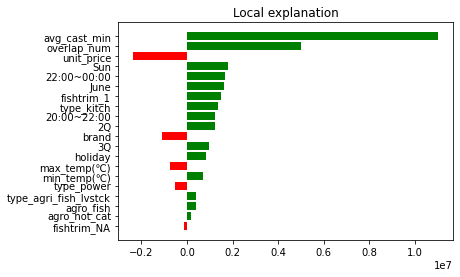

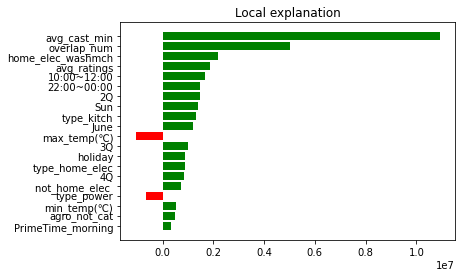

In [69]:
# 일요일 상위
expl(1306)
expl(2543)
expl(579)